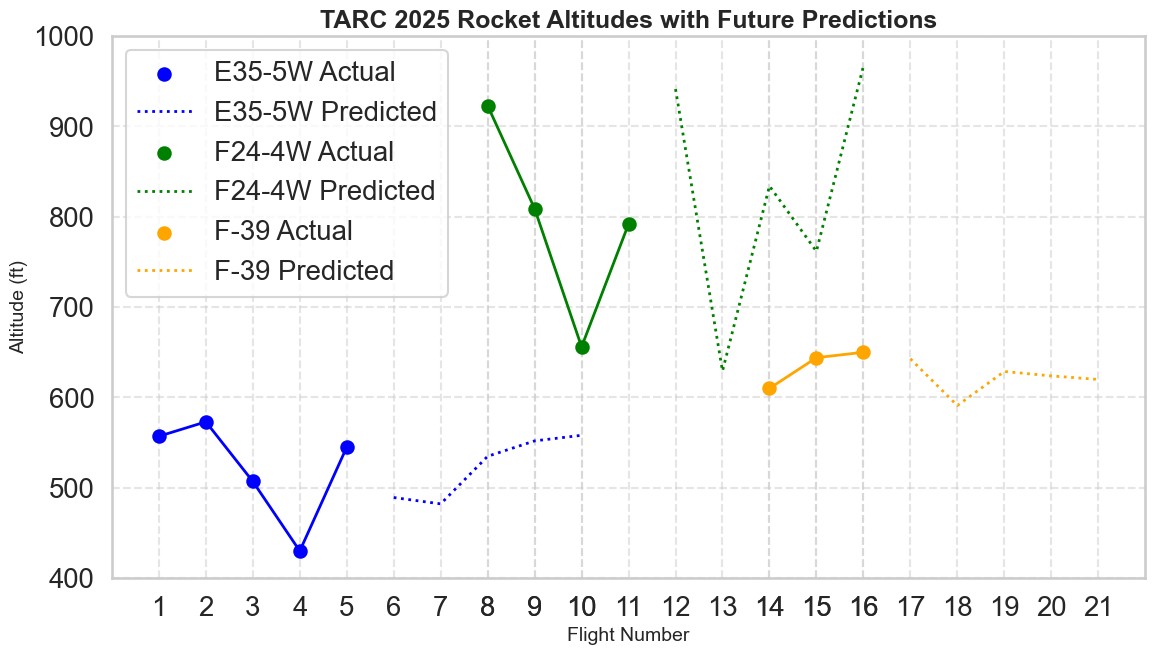

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Flight data
data = {
    'Motor': ['E35-5W'] * 5 + ['F24-4W'] * 4 + ['F-39'] * 3,
    'Altitude': [557, 573, 507, 430, 545, 923, 809, 656, 792, 610, 644, 650]
}

df = pd.DataFrame(data)

# Define motor colors
motor_colors = {
    'E35-5W': 'blue',
    'F24-4W': 'green',
    'F-39': 'orange'
}

# Set up figure
plt.figure(figsize=(12, 7))
plt.title("TARC 2025 Rocket Altitudes with Future Predictions", fontsize=18, weight='bold')
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Altitude (ft)", fontsize=14)

# To keep track of x values
x_start = 1
xticks = []

# Plot each motor's data separately
for motor in df['Motor'].unique():
    altitudes = df[df['Motor'] == motor]['Altitude'].values
    num_points = len(altitudes)
    x_vals = list(range(x_start, x_start + num_points))
    xticks += x_vals

    # Plot real data points
    plt.scatter(x_vals, altitudes, color=motor_colors[motor], label=f"{motor} Actual", s=80, zorder=3)

    # Line through actual points
    plt.plot(x_vals, altitudes, color=motor_colors[motor], linewidth=2)

    # Prediction (dotted line)
    if num_points > 2:
        mean = np.mean(altitudes)
        std = np.std(altitudes)
        pred_points = 5
        pred_x = list(range(x_start + num_points, x_start + num_points + pred_points))
        pred_y = np.random.normal(mean, std, pred_points)
        plt.plot(pred_x, pred_y, linestyle='dotted', color=motor_colors[motor], linewidth=2, label=f"{motor} Predicted")

        xticks += pred_x

    x_start += num_points + 2  # space between motor types

# Final touches
plt.legend()
plt.xticks(xticks)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(400, 1000)
plt.tight_layout()

# Save as PNG
plt.savefig("motor_altitude_prediction.png", dpi=300)
plt.show()
